## Count

In [68]:
library("rlang")
library("ggplot2")
library("MASS")
library("fitdistrplus")
library("stats")
library("extraDistr")
library("actuar")
library("zoo")
library("ismev")
library("evd")
library("stats")
library("nortest")
library("cmstatr")
library("evir")
library("EnvStats")
library("fGarch") # snormFit
library("sn") # snormFit
library("eva") # gpdFit
library("tea") # dAMSE
library("POT") # fitgpd
library("evmix") #fkden, 

options(digits = 10)

Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.


Attaching package: ‘evd’


The following objects are masked from ‘package:actuar’:

    dgumbel, pgumbel, qgumbel, rgumbel


The following objects are masked from ‘package:extraDistr’:

    dfrechet, dgev, dgpd, dgumbel, pfrechet, pgev, pgpd, pgumbel,
    qfrechet, qgev, qgpd, qgumbel, rfrechet, rgev, rgpd, rgumbel



Attaching package: ‘evir’


The following objects are masked from ‘package:evd’:

    dgev, dgpd, pgev, pgpd, qgev, qgpd, rgev, rgpd


The following objects are masked from ‘package:extraDistr’:

    dgev, dgpd, pgev, pgpd, qgev, qgpd, rgev, rgpd


The following object is masked from ‘package:ggplot2’:

    qplot



Attaching package: ‘EnvStats’


The following object is masked from ‘package:cmstatr’:

    cv


The following objects are masked from ‘

## monthly frequency distribution

In [42]:
df <- data.frame(read.csv("./dataset/final_sunspot_count_data.csv"))

In [74]:
df

date,count,std,observation
<chr>,<dbl>,<dbl>,<int>
1818-01-01,0,-1.0,0
1818-01-02,0,-1.0,0
1818-01-03,0,-1.0,0
1818-01-04,0,-1.0,0
1818-01-05,0,-1.0,0
1818-01-06,0,-1.0,0
1818-01-07,0,-1.0,0
1818-01-08,65,10.2,1
1818-01-09,0,-1.0,0


In [44]:
df$count[df$count == -1] <- 0

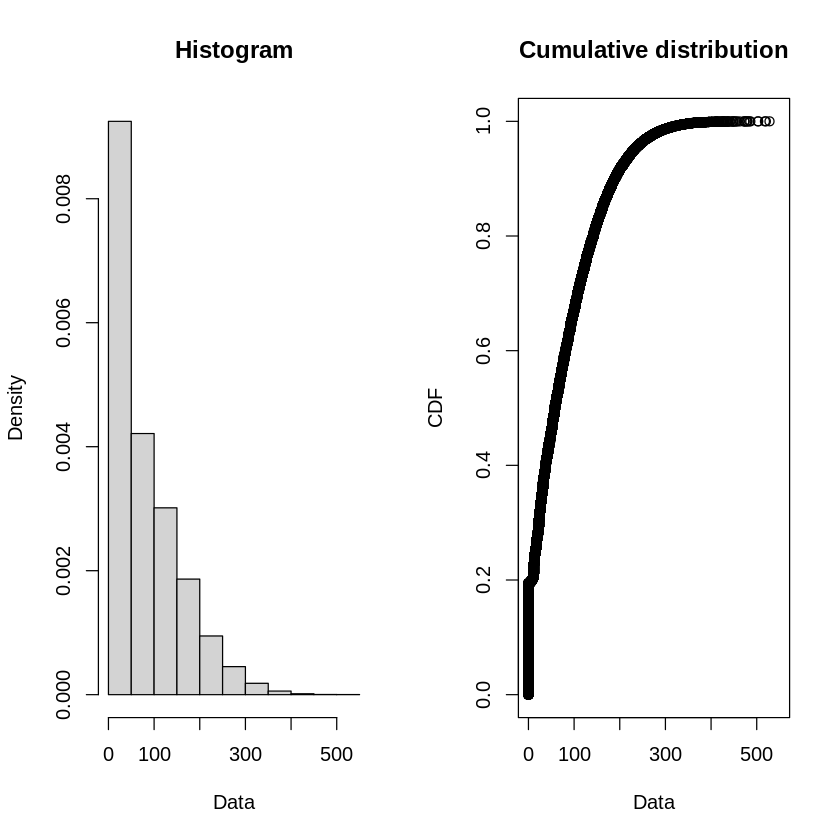

In [53]:
plotdist(df$count, histo=TRUE)

In [54]:
freq_data <- df$count

In [55]:
zero.ratio = sum(freq_data == 0) / length(freq_data)
zero.ratio

[1] 0.1943313

In [56]:
pois.est <- fitdist(freq_data, "pois")
nbinom.est <- fitdist(freq_data, "nbinom")

In [57]:
c(pois.est$loglik, nbinom.est$loglik)

[1] -3099684.8  -392411.8

In [58]:
dist.list <- list(pois.est, nbinom.est)
dist.c <- c("pois", "nbinom")
gofstat(dist.list, fitnames = dist.c)

Chi-squared statistic:  Inf 38208.36 
Degree of freedom of the Chi-squared distribution:  93 92 
Chi-squared p-value:  0 0 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
       obscounts    theo pois theo nbinom
<= 0       14645 3.857248e-30   6747.5561
<= 8         512 1.605597e-19  14065.4483
<= 11        756 8.313348e-17   2965.8669
<= 12       1331 4.727927e-16    886.3978
<= 13        899 2.871584e-15    845.2580
<= 15        969 1.014445e-13   1583.7849
<= 17        763 2.374628e-12   1462.9405
<= 18        548 8.571006e-12    692.4864
<= 20        694 1.762348e-10   1316.8232
<= 22        972 2.426208e-09   1236.3755
<= 23        931 6.514023e-09    591.2814
<= 25       1131 8.911455e-08   1134.1130
<= 27       1171 8.066326e-07   1075.4865
<= 28        798 1.695016e-06    517.6969
<= 30        911 1.676125e-05    998.6082
<= 32        892 1.072711e-04    953.3633
<= 33        641 1.826417e-04    460.9790
<= 35        665 1.380990e-03    892.7

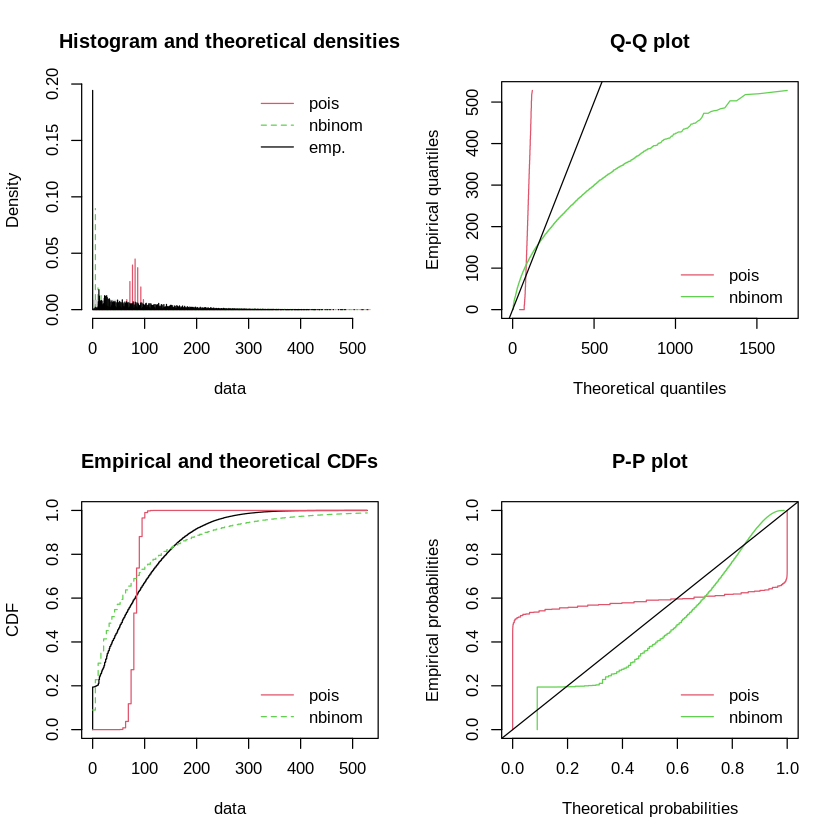

In [59]:
par(mfrow=c(2,2))

denscomp(dist.list, legendtext = dist.c)
qqcomp(dist.list, legendtext = dist.c)
cdfcomp(dist.list, legendtext = dist.c)
ppcomp(dist.list, legendtext = dist.c)

## Size

In [60]:
df.size <- data.frame(read.csv('./dataset/final_sunspot_size_data.csv'))

In [63]:
df.size

date,Total,North,South
<chr>,<dbl>,<dbl>,<dbl>
1874-05-01,-1,-1,-1
1874-05-02,-1,-1,-1
1874-05-03,-1,-1,-1
1874-05-04,-1,-1,-1
1874-05-05,-1,-1,-1
1874-05-06,-1,-1,-1
1874-05-07,-1,-1,-1
1874-05-08,-1,-1,-1
1874-05-09,1298,446,852


In [70]:
df.size$Total[df.size$Total == -1] <- 0
df.size <- df.size[df.size$Total != 0, ]

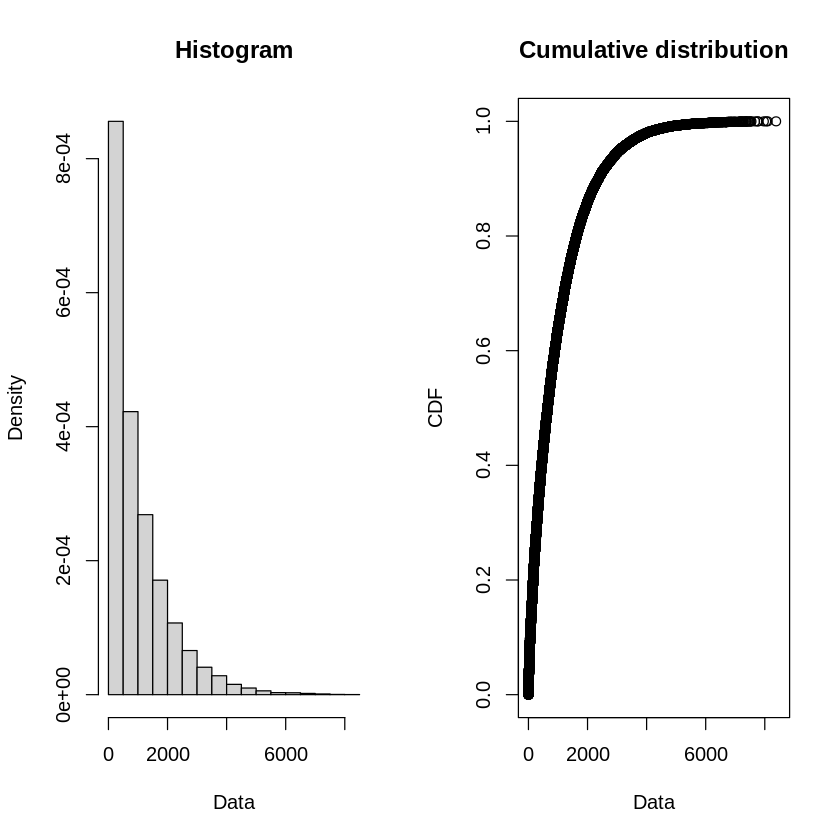

In [71]:
plotdist(df.size$Total, histo=TRUE)

In [72]:
loss <- df.size$Total

In [73]:
loss.body <- loss
gpd.loglik.tail <- 0

# ==============================================================
# Exponential
exp.model.body <- eexp(loss.body, method = "mle")$param
exp.loglik.body <- sum(dexp(x=loss.body
                            , rate = exp.model.body["rate"]
                            , log=T))
exp.loglik <- exp.loglik.body+gpd.loglik.tail
c("Exponential 로그우도: ",exp.loglik)


# ==============================================================
# Gamma
gamma.model.body <- egamma(loss.body, method = "mle")$param
gamma.loglik.body <- sum(dgamma(x=loss.body,
                               shape = gamma.model.body["shape"],
                               scale = gamma.model.body["scale"],
                               log = T))
gam.loglik <- gamma.loglik.body+gpd.loglik.tail
c("Gamma 로그우도: ", gam.loglik)


# ==============================================================
# Lognorm
lognorm.model.body <- fitdist(data=loss.body, distr="lnorm", method = "mle")
lognorm.loglik.body <- lognorm.model.body$loglik
lnorm.loglik <- lognorm.loglik.body+gpd.loglik.tail
c("Log-normal 로그우도: ", lnorm.loglik)

# ==============================================================
# Log-Logistic
llogis.model.body <- fitdist(data=loss.body, distr="llogis", method = "mle")
llogis.loglik.body <- llogis.model.body$loglik
llogis.loglik <- llogis.loglik.body+gpd.loglik.tail
c("Log-logistic 로그우도: ", llogis.loglik)


# ==============================================================
# Weibull 
weibull.model.body <- fitdist(data=loss.body, distr="weibull", method = "mle")
weibull.loglik.body <- weibull.model.body$loglik
wei.loglik <- weibull.loglik.body+gpd.loglik.tail
c("Weibull 로그우도: ", wei.loglik)


# ==============================================================
# skew-normal
snorm.model.body <- snormFit(loss.body)$par
snorm.loglik.body <- sum(dsnorm(x = loss.body,
                               mean = snorm.model.body["mean"],
                               sd = snorm.model.body["sd"],
                               xi = snorm.model.body["xi"],
                               log = T))
snorm.loglik <- snorm.loglik.body+gpd.loglik.tail
c("Skew-normal 로그우도: ", snorm.loglik)

[1] "Exponential 로그우도: " "-349028.09990711"

[1] "Gamma 로그우도: "  "-348441.215993977"

[1] "Log-normal 로그우도: " "-352690.555525963"

[1] "Log-logistic 로그우도: " "-352227.57541394"

[1] "Weibull 로그우도: " "-348523.248616827"

[1] "Skew-normal 로그우도: " "-353558.537108571"